# Mount dataset resources

In [105]:
import re
import pandas as pd
import numpy as np
import warnings

import datetime
from datetime import datetime, date
import time

# Visualisation
from matplotlib import pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# чтениие/запись файлов в feather-формате
import feather

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
%cd '/content/drive/MyDrive/github/eda_examples/guide_EDA/'
%pwd

/content/drive/MyDrive/github/eda_examples/guide_EDA


'/content/drive/MyDrive/github/eda_examples/guide_EDA'

# A guided introduction to Exploratory Data Analysis (EDA)

[Текст ссылки](https://growingdata.com.au/a-guided-introduction-to-exploratory-data-analysis-eda-using-python/)


Исследовательский анализ данных (EDA) является наиболее важным начальным шагом для специалистов по данным при анализе нового набора данных. В этом руководстве описаны простые и продвинутые методы с использованием Python.

**Как мне начать работу с проектом по DS/ML?**

**Какова глубина и широта данных?**

**Достаточно ли предсказуемы данные для моделирования?**

Итак, что такое EDA ?

EDA - это процесс выполнения начальных исследований данных с целью:

* Раскрыть основную структуру и закономерности в данных
* Определить важные переменные
* Выявить аномалии
* Проверить гипотезу
* Проверить предположения
* Подготовить почву для разработки модели

Исследовательский анализ данных похож на то, чтобы прислушиваться к тому, что могут сказать нам данные, прежде чем мы начнем фактический процесс моделирования, чтобы получить фору. Результатом этого анализа являются некоторые идеи, представленные обобщенной статистикой и графическими представлениями. Кроме того, рекомендуется использовать несколько исследовательских методов, чтобы иметь больше уверенности в выводах, сделанных в отношении данных.

Вообще говоря, любой метод просмотра данных, который не включает формальное статистическое моделирование и логические выводы, может подпадать под действие исследовательского анализа данных. Фактически, EDA можно считать наиболее важным шагом в анализе данных, без которого вы можете получить менее оптимальные, менее интерпретируемые и менее точные модели.

**Образец набора данных**

Для объяснения различных методов EDA мы используем набор данных о дорожно-транспортных происшествиях в викторианском стиле . Этот набор данных содержит информацию о ДТП, такую ​​как время, место, условия, тип ДТП, тип участника дорожного движения, столкновение с объектом и т. Д. В периоды между (2010–2015 гг.). Одна из причин автомобильных аварий - вождение в нетрезвом виде. Таким образом, для простоты предположим, что цель нашего анализа здесь - предсказать, была ли данная авария вызвана употреблением алкоголя или нет. Здесь вы найдете текстовые описания всех полей в наборе данных, а также типов данных.

# 1. Понимание набора данных (Understending the dataset)
Первый шаг EDA - понять, насколько велики данные? сколько функций у нас есть? каков результат нашего анализа? 

Набор данных об авариях включает 74 908 наблюдений, описанных 65 объектами. Одна из них - зависимая переменная (целевой класс), а остальные 64 - независимые переменные. Типы данных, доступные в этом наборе данных, - это floats (4), integers (27 функций) и string (text) (32 функции), которые могут быть разделены на произвольные текстовые признаки или категориальные признаки. К числовым признакам относят любые признаки с любой формой числовых значений (float, integer, double, long, etc). К категориальным характеристикам относятся переменные, которые могут принимать одно из ограниченного и обычно фиксированного числа возможных значений. Все функции с плавающими значениями представляют собой значения координат, относящиеся к месту аварии. Для простоты, мы выбрали только 12 числовых признаков и 8 категориальных признаков; Фактически, вы можете выполнить анализ выбранных признаков и в конечном итоге выбрать другой набор функций. Выбранные числовые функции описаны ниже:

## 1.1 Import libraries & load dataset

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [110]:
data = pd.read_csv("Crashes_Last_Five_Years.csv")

## 1.2 Data sample inspection

In [111]:
data.head()

,X,Y,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,POLICE_ATTEND,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,RUN_OFFROAD,NODE_ID,LONGITUDE,LATITUDE,NODE_TYPE,LGA_NAME,REGION_NAME,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,ALCOHOL_RELATED,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,DEG_URBAN_ALL,LGA_NAME_ALL,REGION_NAME_ALL,SRNS,SRNS_ALL,RMA,RMA_ALL,DIVIDED,DIVIDED_ALL,STAT_DIV_NAME
0,144.535609,-37.476504,3145907,T20130019206,ABS to receive accident,Finished,18/9/2013,09.15.00,No,Collision with vehicle,Wednesday,HEAD ON (NOT OVERTAKING),No,Day,Yes,Not at intersection,Serious injury accident,100 km/hr,No,264055,144.53561,-37.47650,Non-Intersection,MACEDON RANGES,NORTHERN REGION,2458928.133,2447023.864,3,3,0,2,1,0,1,2,0,1,2,0,0,0,0,0,0,0,0,1,No,0,2,0,2,0,0,RURAL_VICTORIA,RURAL_VICTORIA,MACEDON RANGES,NORTHERN REGION,C,C,Arterial Other,Arterial Other,Undivided,Undiv,Country
1,144.946970,-37.846997,3145908,T20130019208,ABS to receive accident,Finished,16/9/2013,21.01.00,Yes,Collision with vehicle,Monday,LEFT REAR,No,Dark Street lights on,Yes,T intersection,Other injury accident,60 km/hr,No,37458,144.94697,-37.84700,Intersection,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,2495332.798,2406005.117,3,1,0,0,1,2,2,1,0,1,2,0,0,0,0,0,0,0,0,1,No,0,2,0,1,0,0,MELB_URBAN,MELB_URBAN,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Divided,"Div,Undiv",Metro
2,144.318699,-38.196891,3145909,T20130019604,ABS to receive accident,Finished,21/9/2013,14.40.00,Yes,Collision with vehicle,Saturday,CROSS TRAFFIC(INTERSECTIONS ONLY),No,Day,No,Cross intersection,Other injury accident,70 km/hr,No,223827,144.31870,-38.19689,Intersection,GEELONG,SOUTH WESTERN REGION,2440316.537,2366955.405,2,1,0,0,1,1,1,1,0,0,2,0,0,0,0,0,0,0,0,0,No,0,2,0,2,0,0,LARGE_PROVINCIAL_CITIES,LARGE_PROVINCIAL_CITIES,GEELONG,SOUTH WESTERN REGION,A,"A,C",Arterial Highway,"Arterial Highway,Arterial Other",Divided,"Div,Undiv",Country
3,145.158998,-37.804470,3145910,T20130019605,ABS to receive accident,Finished,23/9/2013,12.50.00,No,Collision with vehicle,Monday,HEAD ON (NOT OVERTAKING),No,Day,Yes,Not at intersection,Serious injury accident,60 km/hr,No,263761,145.15900,-37.80447,Non-Intersection,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,2514001.452,2410714.702,4,2,0,1,1,2,1,3,0,2,2,0,0,0,0,0,0,0,0,0,No,0,2,0,2,0,0,MELB_URBAN,MELB_URBAN,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undiv,Metro
4,144.797813,-37.701079,3145911,T20130019606,ABS to receive accident,Finished,23/9/2013,17.15.00,No,Collision with vehicle,Monday,REAR END(VEHICLES IN SAME LANE),No,Day,No,T intersection,Other injury accident,Not known,No,263654,144.79781,-37.70108,Intersection,BRIMBANK,METROPOLITAN NORTH WEST REGION,2482170.943,2422182.260,4,2,0,0,2,2,3,1,0,2,2,0,0,0,0,0,0,0,0,0,No,0,2,0,2,0,0,MELB_URBAN,MELB_URBAN,BRIMBANK,METROPOLITAN NORTH WEST REGION,C,C,Arterial Other,Arterial Other,Divided,"Div,Undiv",Metro


Мы можем выделить числовые и категориальные признаки в отдельные фреймы данных для упрощения манипуляции и визуализации.

In [112]:
numeric_features = data[["INJ_OR_FATAL","FATALITY","MALES",
       "FEMALES","DRIVER","PEDESTRIAN",
       "OLD_DRIVER","YOUNG_DRIVER" ,"UNLICENCSED",
       "HEAVYVEHICLE","PASSENGERVEHICLE","MOTORCYCLE"
]]
categorical_features=data[[
       "ACCIDENT_TIME","ACCIDENT_TYPE","DAY_OF_WEEK",
        "DCA_CODE","HIT_RUN_FLAG","LIGHT_CONDITION",
        "ROAD_GEOMETRY","SPEED_ZONE"
]]

## 1.3 Target class distribution

In [113]:
data["ALCOHOL_RELATED"].value_counts()

#gives each count of the alchohol related classes
data["ALCOHOL_RELATED"].value_counts()

#gives each count of the alchohol related classes
#No     72429
#Yes     2479
#Name: ALCOHOL_RELATED, dtype: int64

No     69922
Yes     2362
Name: ALCOHOL_RELATED, dtype: int64

Мы видим, что существует огромный классовый дисбаланс, что является очень важным наблюдением. Это имеет большое влияние на то, как выбирать экземпляры для обучения и тестирования. При случайном выборе рекомендуется стратифицировать данные, чтобы сохранить одинаковое распределение классов в обучающей и тестовой выборках. В некоторых случаях может потребоваться использование таких методов, как oversampling or undersampling, чтобы восстановить баланс классов для лучшего обучения модели. Более того, это даже повлияет на выбор модели классификации и на то, сможет ли она соответствующим образом справиться с дисбалансом классов.  

## 1.4 Primary statistics

Интересно, что вы можете использовать функцию описания из Pandas для печати полезной статистики, такой как количество, среднее, стандартное, минимальное, максимальное, 25%, 50% и 75% значения процентилей для каждого столбца. Для нечисловых функций эти значения могут показаться бессмысленными.


In [114]:
print(data.describe())

                  X             Y  ...    MOTORCYCLE  PUBLICVEHICLE
count  72284.000000  72284.000000  ...  72284.000000   72284.000000
mean     144.971084    -37.708799  ...      0.151984       0.012686
std        0.814227      0.568420  ...      0.368027       0.112779
min      140.966483    -39.023989  ...      0.000000       0.000000
25%      144.848633    -37.949591  ...      0.000000       0.000000
50%      145.012571    -37.815843  ...      0.000000       0.000000
75%      145.203503    -37.696969  ...      0.000000       0.000000
max      149.757468    -34.127672  ...      5.000000       2.000000

[8 rows x 34 columns]


также может быть полезно посмотреть статистику для каждого класса отдельно для сравнения.


In [115]:
alchohol_related_yes = data[data["ALCOHOL_RELATED"]=='Yes']
alchohol_related_yes.describe()

,X,Y,OBJECTID,NODE_ID,LONGITUDE,LATITUDE,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
count,2362.000000,2362.000000,2.362000e+03,2362.000000,2362.000000,2362.000000,2.362000e+03,2.362000e+03,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,144.884862,-37.638597,3.178582e+06,248634.397968,144.884862,-37.638597,2.489536e+06,2.428627e+06,1.692633,1.317528,0.058425,0.661727,0.597375,0.375106,1.201524,0.453006,0.012701,0.359018,1.156224,0.032176,0.005080,0.108383,0.019052,0.000423,0.003810,0.002540,0.016511,0.309483,0.091448,1.466977,0.027096,1.290432,0.108806,0.003810
std,1.031724,0.753842,2.093709e+04,101771.344019,1.031724,0.753842,9.174043e+04,8.325362e+04,1.166534,0.753322,0.271424,0.746790,0.742634,0.813809,0.912540,0.722156,0.115725,0.820004,0.646023,0.199060,0.071111,0.320323,0.174803,0.020576,0.061623,0.050347,0.127459,0.504435,0.288306,0.765611,0.174952,0.823923,0.320840,0.061623
min,141.144150,-38.792599,3.143922e+06,100.000000,141.144150,-38.792600,2.144161e+06,2.299967e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,144.581156,-38.017921,3.160266e+06,264157.250000,144.581157,-38.017918,2.463026e+06,2.386825e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,145.024559,-37.821752,3.178954e+06,288900.000000,145.024560,-37.821750,2.502160e+06,2.408541e+06,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.257339,-37.623332,3.196954e+06,312923.000000,145.257342,-37.623333,2.522470e+06,2.430063e+06,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
max,149.740253,-34.147331,3.216069e+06,340294.000000,149.740250,-34.147330,2.918681e+06,2.812367e+06,11.000000,9.000000,4.000000,7.000000,7.000000,6.000000,7.000000,5.000000,2.000000,8.000000,6.000000,4.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,6.000000,3.000000,6.000000,3.000000,1.000000


In [116]:
alchohol_related_no = data[data["ALCOHOL_RELATED"]=='No']
alchohol_related_no.describe()

,X,Y,OBJECTID,NODE_ID,LONGITUDE,LATITUDE,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,INJ_OR_FATAL,FATALITY,SERIOUSINJURY,OTHERINJURY,NONINJURED,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,PEDESTRIAN,PILLION,MOTORIST,UNKNOWN,PED_CYCLIST_5_12,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
count,69922.000000,69922.000000,6.992200e+04,69922.000000,69922.000000,69922.000000,6.992200e+04,6.992200e+04,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000,69922.000000
mean,144.973996,-37.711170,3.180098e+06,201538.928935,144.973996,-37.711170,2.497616e+06,2.420774e+06,2.410500,1.260705,0.017276,0.325091,0.918338,1.149795,1.321601,0.968980,0.109622,0.519679,1.466792,0.102800,0.005549,0.153171,0.052845,0.009425,0.016876,0.020408,0.067075,0.300406,0.031263,1.816925,0.046366,1.428549,0.153442,0.012986
std,0.805704,0.560941,2.086271e+04,125302.384850,0.805704,0.560942,7.154441e+04,6.195309e+04,1.550614,0.697106,0.140544,0.580246,0.757279,1.364237,1.010982,1.089111,0.323265,1.251474,0.892639,0.331096,0.075432,0.368942,0.360912,0.104448,0.133282,0.144792,0.256198,0.518958,0.175177,0.744976,0.222376,0.913623,0.369430,0.114095
min,140.966483,-39.023989,3.143907e+06,4.000000,140.966480,-39.023990,2.129485e+06,2.274527e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,144.854352,-37.947037,3.162044e+06,45697.000000,144.854355,-37.947038,2.487151e+06,2.394834e+06,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,145.012317,-37.815788,3.180098e+06,273548.500000,145.012320,-37.815790,2.501084e+06,2.409436e+06,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
75%,145.200609,-37.698650,3.198154e+06,305752.750000,145.200605,-37.698650,2.517633e+06,2.422362e+06,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
max,149.757468,-34.127672,3.216190e+06,340669.000000,149.757470,-34.127670,2.920148e+06,2.814427e+06,97.000000,27.000000,4.000000,17.000000,25.000000,87.000000,46.000000,51.000000,8.000000,95.000000,12.000000,9.000000,2.000000,5.000000,52.000000,8.000000,3.000000,3.000000,3.000000,5.000000,2.000000,14.000000,4.000000,13.000000,5.000000,2.000000


# 2. Univariate Analysis (Одномерный)

Самая простая форма статистического анализа в процессе EDA - это одномерный анализ. В этом анализе участвует только одна переменная. Фактически, основная цель анализа - описать, понять распределение совокупности, выявить выбросы, обобщить и найти закономерности для одного признака. Обратите внимание, что этот тип анализа отличается в отношении числовых и категориальных характеристик с точки зрения представляющих интерес характеристик значений данных. 

## 2.1 Numeric Features (Числовые)
Основными характеристиками числовых переменных являются центр, разброс, выбросы, модальность (количество пиков в функции плотности вероятности), кумулятивная функция распределения (Cumulative Distribution Function - CDF), форма (включая тяжесть хвостов). 


### 2.1.1 Center & Spread
Наиболее распространенными и полезными показателями центральной тенденции являются статистические данные о среднем арифметическом, медиане и иногда моде. Для любого распределения симметричной формы среднее значение - это точка, вокруг которой сохраняется симметрия. С другой стороны, разброс относится к изменчивости данных. Это индикатор того, насколько далеко от центра могут быть найдены значения данных. Спрэд распределения можно описать некоторыми известными мерами, включая дисперсию и стандартное отклонение. Как упоминалось ранее, статистические данные, такие как среднее значение, медиана, стандартное отклонение и процентили, могут быть легко рассчитаны с помощью pandas, как показано ниже:


In [117]:
numeric_features.describe()

,INJ_OR_FATAL,FATALITY,MALES,FEMALES,DRIVER,PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE
count,72284.000000,72284.000000,72284.000000,72284.000000,72284.000000,72284.000000,72284.000000,72284.000000,72284.000000,72284.000000,72284.000000,72284.000000
mean,1.262562,0.018621,1.317677,0.952119,1.456643,0.100493,0.065423,0.300703,0.033230,0.045736,1.424036,0.151984
std,0.699082,0.146857,1.008137,1.082983,0.887383,0.327863,0.253187,0.518489,0.180315,0.221013,0.911157,0.368027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
max,27.000000,4.000000,46.000000,51.000000,12.000000,9.000000,3.000000,5.000000,2.000000,4.000000,13.000000,5.000000


Гистограммы все еще можно использовать для отображения распределения интересующих переменных. Вы даже можете строить графики распределения для нескольких переменных одновременно. Это даст вам целостное представление обо всех переменных для лучшего понимания. Ниже мы показываем все числовые распределения признаков с помощью гистограммы (столбиковой диаграммы). Ось абсцисс представляет заданные значения, а ось ординат - их частоты.

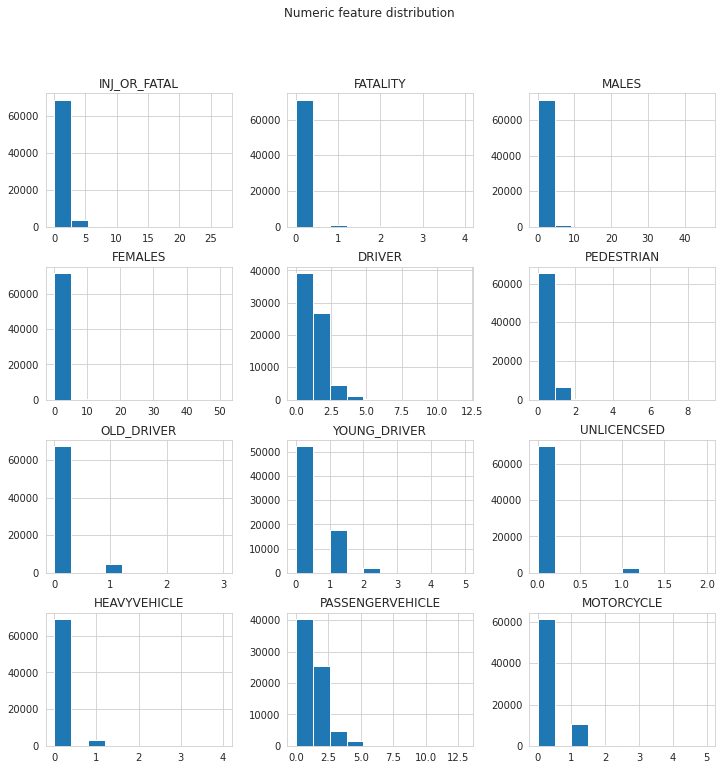

In [118]:
numeric_features.hist(figsize=[12,12])
plt.suptitle("Numeric feature distribution")
plt.show()

### 2.1.2 Outliers (Выбросы)
Определение выбросов является сложным, поскольку не существует общепризнанного единого формального определения выбросов. Грубо говоря, это относится к значениям, которые находятся за пределами областей распределения, которые обычно встречаются. Кроме того, согласно другому общепринятому определению любая точка, отстоящая от среднего значения более чем на фиксированное число стандартных отклонений, считается «выбросом» (“outlier”) . Другими словами, мы можем рассматривать значения данных, соответствующие областям распределения с низкой плотностью или вероятностью, как предполагаемые выбросы. Boxplot диаграмма очень хороша для представления статистической информации, такой как выбросы. График представляет собой прямоугольную рамку, ограниченную сверху и снизу “hinges”, которые представляют 75% и 25% квантилей соответственно. Мы можем рассматривать “median” как горизонтальную линию, проходящую через рамку. Вы также можете увидеть верхний и нижний «усы». Вертикальная ось - единицы количественной переменной. Точки данных над верхними усами и выше - это предполагаемые «выбросы». Набор данных об автокатастрофах может быть не лучшим объяснением этой особенности. Однако мы будем включать только для полноты и охвата. Ниже приведен пример построения прямоугольной диаграммы для трех переменных («INJ_OR_FATAL», «YOUNG_DRIVER», «PASSENGERVEHICLE»):


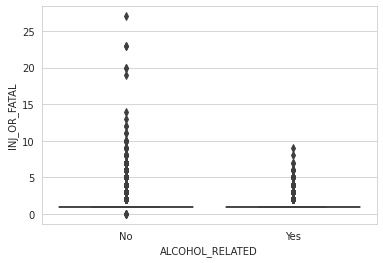

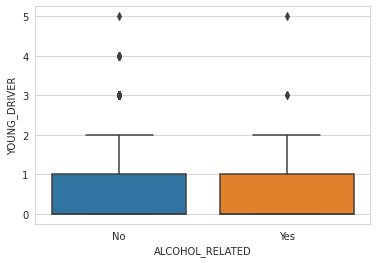

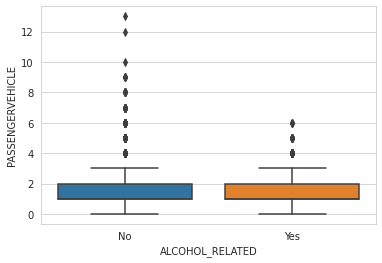

In [119]:
sns.boxplot(x='ALCOHOL_RELATED',y='INJ_OR_FATAL',data=data)
plt.show()
sns.boxplot(x='ALCOHOL_RELATED',y='YOUNG_DRIVER',data=data)
plt.show()
sns.boxplot(x='ALCOHOL_RELATED',y='PASSENGERVEHICLE',data=data)
plt.show()

**Выводы:**

* Количество травм более 10 менее вероятно из-за употребления алкоголя.
* Тем более, что легковые автомобили, попавшие в аварии, на самом деле не подтверждают, что это произошло из-за употребления алкоголя.
* Молодые водители, попавшие в аварии, связанные с употреблением алкоголя, составляют от 1 до 2.

### 2.1.3 Probability Density Function (PDF) - Функция плотности вероятности
Мы начнем с визуализации PDF для одной фичи. В качестве примера мы показываем PDF количества запросов о ДТП из-за употребления алкоголя. Ниже мы построим PDF количества травм. Ось X представляет диапазоны значений, а ось Y представляет процент точек данных для каждого целевого значения.

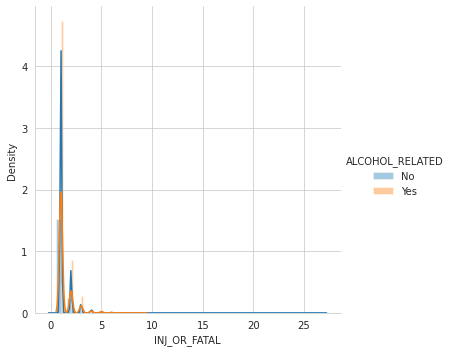

In [120]:
sns.FacetGrid(data,hue="ALCOHOL_RELATED",height = 5).map(sns.distplot,"INJ_OR_FATAL").add_legend()
plt.show()

**Выводы:**

* Очень вероятно, что аварии из-за употребления алкоголя приведут к большему количеству жертв.
* Между двумя PDF-диаграммами наблюдается очень ограниченное совпадение, что говорит нам о том, что количество пострадавших визуально различается в зависимости от потребления алкоголя.

### 2.1.4 Cumulative Distribution Function (CDF) - Кумулятивная функция распределения

CDF - это вероятность того, что соответствующая непрерывная случайная величина имеет значение, меньшее или равное заданному значению. Он дает площадь под функцией плотности вероятности. Это аналогично таблице совокупной частоты, где частота - это количество раз, когда встречается определенное число или элемент. Ниже приведен код для создания графика для CDF для переменной INJ_OR_FATAL. 

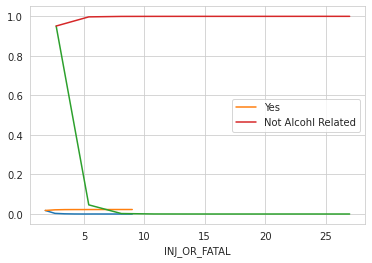

In [121]:
counts_related, bin_edges_related = np.histogram(alchohol_related_yes['INJ_OR_FATAL'], bins=10, density = True)
pdf_related = counts_related/(sum(bin_edges_related))
cdf_related = np.cumsum(pdf_related)
plt.plot(bin_edges_related[1:], pdf_related)
plt.plot(bin_edges_related[1:], cdf_related, label = 'Yes')
plt.xlabel('INJ_OR_FATAL')
counts_not_related, bin_edges_not_related = np.histogram(alchohol_related_no['INJ_OR_FATAL'], bins=10, density = True)
pdf_not_related = counts_not_related/(sum(counts_not_related))
cdf_not_related = np.cumsum(pdf_not_related)
plt.plot(bin_edges_not_related[1:], pdf_not_related)
plt.plot(bin_edges_not_related[1:], cdf_not_related, label = 'Not Alcohl Related')
plt.xlabel('INJ_OR_FATAL')
plt.legend()
plt.show()

**Выводы:**

1. Почти 95% аварий, не связанных с употреблением алкоголя, приводят к менее чем 5 несчастным случаям

## 2.2 Categorical Features (Категориальные)

Интересующие характеристики категориальной переменной - это просто диапазон значений и частота появления каждого значения. Одной из полезных форм такого одномерного анализа является табулирование частот. Обычно частоты сопровождают расчет доли (или %) данных, попадающих в каждую категорию. Следует ожидать, что в сумме пропорции составят 1,00 (или 100%). Это может быть очень полезно для поиска ошибок и недостающих данных. Ниже приведены пропорции уникальных переменных для трех параметров ACCIDENT_TYPE и LIGHT_CONDITION.

In [122]:
counts = categorical_features["ACCIDENT_TYPE"].value_counts()
percent100 = categorical_features["ACCIDENT_TYPE"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

print('\n------------------------------\nCrashes broken by type')
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print(light_conditions)

counts = categorical_features["LIGHT_CONDITION"].value_counts()
percent100 = categorical_features["LIGHT_CONDITION"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
light_conditions=pd.DataFrame({'counts': counts, 'Percent': percent100})
print('\n------------------------------\nCrashes broken by lighting conditions')
print(light_conditions)

counts = categorical_features["DAY_OF_WEEK"].value_counts()
percent100 = categorical_features["DAY_OF_WEEK"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
acc_day=pd.DataFrame({'counts': counts, 'Percent': percent100})
print('\n------------------------------\nCrashes broken by weekday')
print(acc_day)


------------------------------
Crashes broken by type
                                   counts Percent
Collision with vehicle              45572   63.0%
Collision with a fixed object       11356   15.7%
Struck Pedestrian                    6382    8.8%
Vehicle overturned (no collision)    3564    4.9%
No collision and no object struck    3554    4.9%
Struck animal                         740    1.0%
collision with some other object      679    0.9%
Fall from or in moving vehicle        383    0.5%
Other accident                         54    0.1%

------------------------------
Crashes broken by lighting conditions
                            counts Percent
Day                          47002   65.0%
Dark Street lights on        11028   15.3%
Dusk/Dawn                     7662   10.6%
Dark No street lights         3914    5.4%
Unk.                          1791    2.5%
Dark Street lights unknown     728    1.0%
Dark Street lights off         159    0.2%

------------------------------

**Выводы:**

* Большинство аварий (63%) происходит из-за столкновения с другими движущимися транспортными средствами, и только 8% из-за столкновения с пешеходами.
* 65% аварий происходит в дневное время, и только 5% происходят на улицах без света.
* Сбои в выходные дни ниже, чем в будние дни, а процент сбоев возрастает ближе к концу недели.

# 3. Bi-Variate analysis (Двумерный)
Двумерный анализ  - это еще один шаг в нашем процессе EDA, где анализ проводится между двумя переменными (характеристиками). Основная цель такого анализа - изучить взаимосвязи между двумя переменными. Это касается наличие ассоциации, её силы, наличия различий и их значимость.

## 3.1 Numerical Features (Числовые)
### 3.1.1 Scatter Plot (Диаграмма рассеяния)

Диаграмма рассеяния может быть очень полезным представлением для визуализации взаимосвязи между двумя числовыми переменными. Фактически, наиболее выгодно построить его до подбора регрессионной модели для проверки потенциальной линейной корреляции. Полученный шаблон указывает тип (линейный или нелинейный) и силу взаимосвязи между двумя переменными. Мы можем добавить больше информации к 2D-графику рассеяния. Например, мы можем маркировать баллы, относящиеся к сбоям, связанным с употреблением алкоголя или нет. Ниже представлена диагрмма рвссеяния количества травм в зависимости от количества пешеходов.

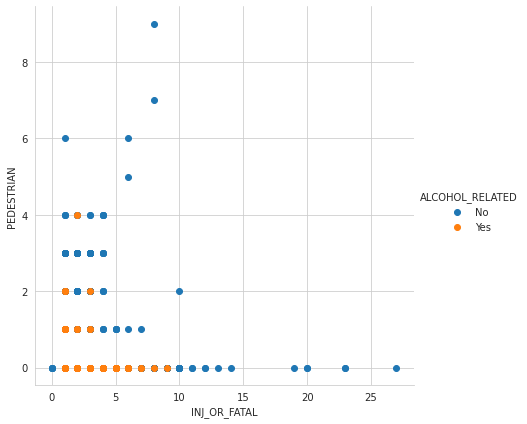

In [123]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue = "ALCOHOL_RELATED" , height = 6).map(plt.scatter,"INJ_OR_FATAL","PEDESTRIAN").add_legend()
plt.show()

**Выводы:**

1. Большое количество пешеходов (pedestrians) травмируется не из-за ДТП с употреблением алкоголя.

Более того, мы можем построить пары переменных для лучшего понимания ассоциаций переменных. Ниже мы строим график зависимости количества травм от количества мотоциклистов, попавших в аварию.

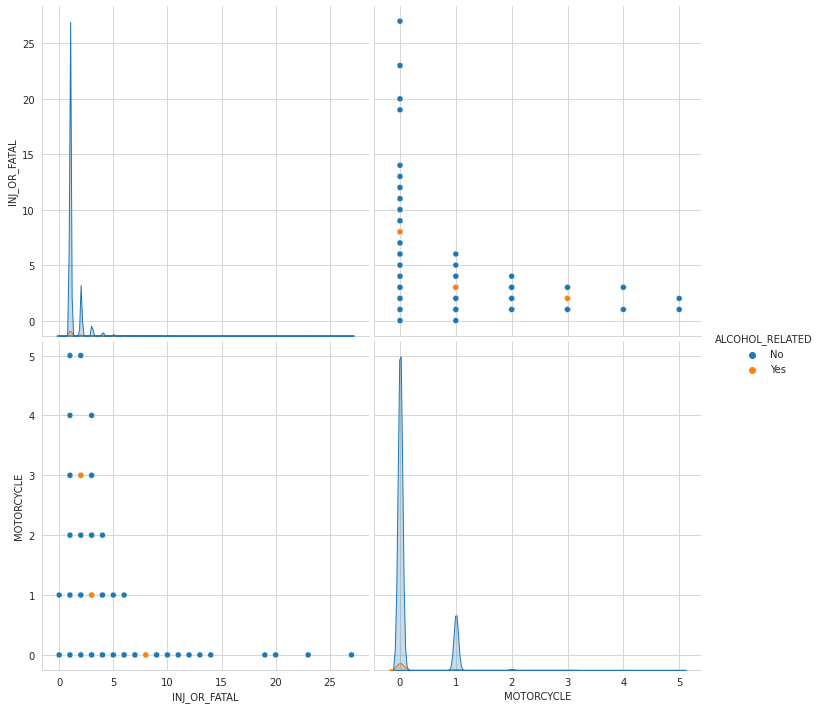

In [124]:
selected_numeric_features = data[["INJ_OR_FATAL","MOTORCYCLE","ALCOHOL_RELATED"]]
sns.set_style("whitegrid")
sns.pairplot(selected_numeric_features, hue = "ALCOHOL_RELATED", height = 5)
plt.show()

**Выводы:**

1. Очень низкое количество травм, связанных с участием мотоциклистов в состоянии алкогольного опьянения

### 3.1.2 Correlation matrix 
Корреляционная матрица - это «квадратная матрица» с теми же переменными, показанными в строках и столбцах. Уровень корреляции между переменными выделен разной интенсивностью цвета. Числовые значения для корреляции варьируются от -1 «не коррелирован или отрицательно коррелирован» до 1 « сильно коррелирован». Одним из вариантов использования корреляционной матрицы является обобщение данных для более сложного анализа. В результате при создании корреляционной матрицы могут быть приняты некоторые ключевые решения. Один из них - это выбор соответствующей статистики корреляции и кодирование переменных. Другой вариант - обработка отсутствующих данных. Еще один вариант использования - удаление сильно коррелированных переменных из наборов признаков. Ниже мы строим тепловую карту корреляции для всех пар числовых функций

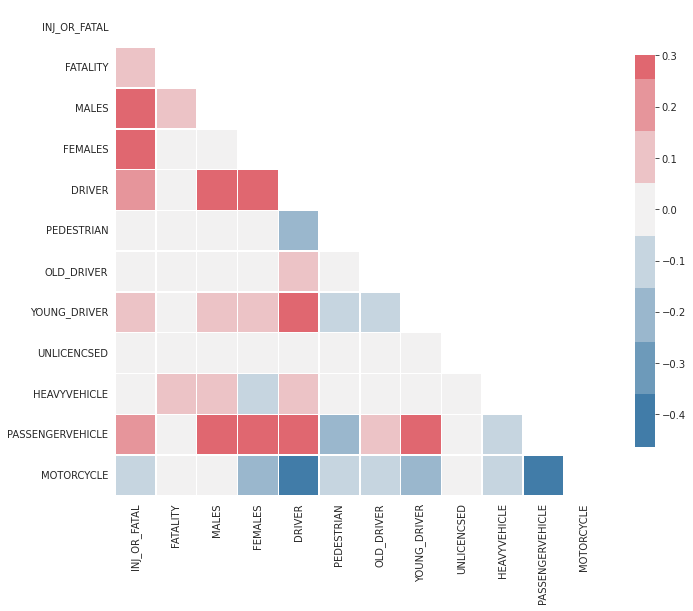

In [125]:
corr =  numeric_features.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

**Выводы:**

1. Существует высокая корреляция между количеством мужчин, участвовавших в аварии, и количеством травм.
2. Более высокая корреляция наблюдается между количеством молодых водителей, попавших в аварию, и количеством водителей. 
3. Существует слабая корреляция между количеством мотоциклов и количеством легковых автомобилей.

## 3.2 Categorical Features


### 3.2.1 Correlation matrix

Чтобы вычислить корреляционную матрицу для пар категориальных признаков, нам нужно сначала закодировать текстовые значения в числовые, чтобы можно было построить их. Мы можем сделать это с помощью SciKit's «LabelEncoder» для простоты.

In [126]:
print(categorical_features.info())
print(categorical_features.columns)
categorical_features.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72284 entries, 0 to 72283
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ACCIDENT_TIME    72284 non-null  object
 1   ACCIDENT_TYPE    72284 non-null  object
 2   DAY_OF_WEEK      70593 non-null  object
 3   DCA_CODE         72284 non-null  object
 4   HIT_RUN_FLAG     72284 non-null  object
 5   LIGHT_CONDITION  72284 non-null  object
 6   ROAD_GEOMETRY    72284 non-null  object
 7   SPEED_ZONE       72284 non-null  object
dtypes: object(8)
memory usage: 4.4+ MB
None
Index(['ACCIDENT_TIME', 'ACCIDENT_TYPE', 'DAY_OF_WEEK', 'DCA_CODE',
       'HIT_RUN_FLAG', 'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SPEED_ZONE'],
      dtype='object')


,ACCIDENT_TIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,ROAD_GEOMETRY,SPEED_ZONE
0,09.15.00,Collision with vehicle,Wednesday,HEAD ON (NOT OVERTAKING),No,Day,Not at intersection,100 km/hr
1,21.01.00,Collision with vehicle,Monday,LEFT REAR,No,Dark Street lights on,T intersection,60 km/hr
2,14.40.00,Collision with vehicle,Saturday,CROSS TRAFFIC(INTERSECTIONS ONLY),No,Day,Cross intersection,70 km/hr


In [127]:
#ob=[]
#for data in train:
#  if train[data].dtype=='object':
#  ob.append(data)

from sklearn.preprocessing import LabelEncoder

# NB! for some reason DAY_OF_WEEK feature can't be transformed by LabelEncoder
# error: should be string or integer
# Need to forcibly transformed to string
categorical_features['DAY_OF_WEEK'] = categorical_features['DAY_OF_WEEK'].astype(str)

category_encoded = categorical_features.copy()
ob = categorical_features.columns
for dt in ob:
  #print(dt,'\t',categorical_features[dt].dtype)
  l=LabelEncoder()
  category_encoded[dt]=l.fit_transform(categorical_features[dt])

print(f'Types:\n{category_encoded.info()}')
category_encoded.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72284 entries, 0 to 72283
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ACCIDENT_TIME    72284 non-null  int64
 1   ACCIDENT_TYPE    72284 non-null  int64
 2   DAY_OF_WEEK      72284 non-null  int64
 3   DCA_CODE         72284 non-null  int64
 4   HIT_RUN_FLAG     72284 non-null  int64
 5   LIGHT_CONDITION  72284 non-null  int64
 6   ROAD_GEOMETRY    72284 non-null  int64
 7   SPEED_ZONE       72284 non-null  int64
dtypes: int64(8)
memory usage: 4.4 MB
Types:
None


,ACCIDENT_TIME,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,HIT_RUN_FLAG,LIGHT_CONDITION,ROAD_GEOMETRY,SPEED_ZONE
0,534,1,6,8,0,4,3,0
1,1240,1,1,17,0,2,6,5
2,859,1,2,2,0,4,0,6


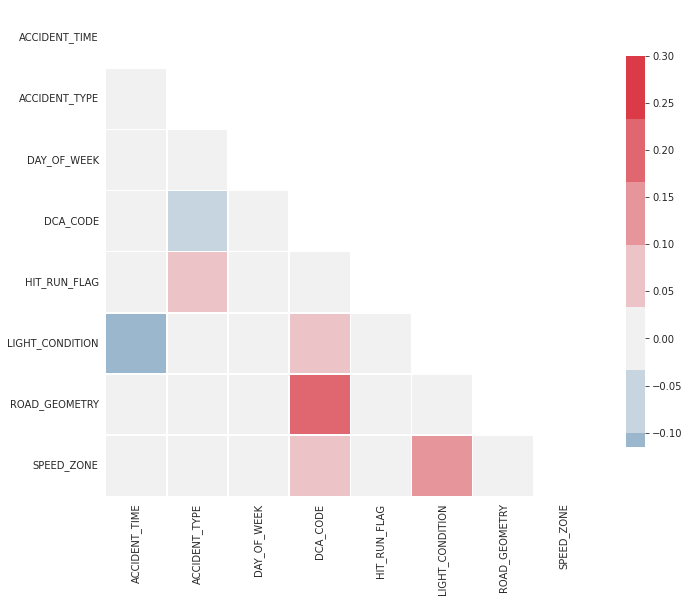

In [128]:
category_corr =  category_encoded.corr()

# Generate a mask for the upper triangle
category_mask = np.zeros_like(category_corr, dtype=np.bool)
category_mask[np.triu_indices_from(category_mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(category_corr, mask=category_mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.show()

**Выводы:**

1. Замечена высокая корреляция между кодами DCA (например, REAR END, VEHICLE OFF FOOTPATH STRIKES VEH ON CARRIAGEWAY) и Road Geometry, что имеет смысл, поскольку геометрия дороги имеет решающее значение при определении типа аварии.  
2. Наблюдается слабая корреляция между временем аварии (accident time) и условиями освещения (lighting condition).


### 3.2.2 Stacked Column Chart (Стековая Столбчатая диаграмма)

Стековая Столбчатая диаграмма может быть полезна для визуализации отношений между двумя категориальными переменными. Мы можем сравнить проценты, которые каждая категория из одной переменной вносит в общую сумму по категориям второй переменной. Ниже представлен составной график для сравнения ДТП, происходящих на дорогах с разной геометрией, в зависимости от зоны ограничения скорости.

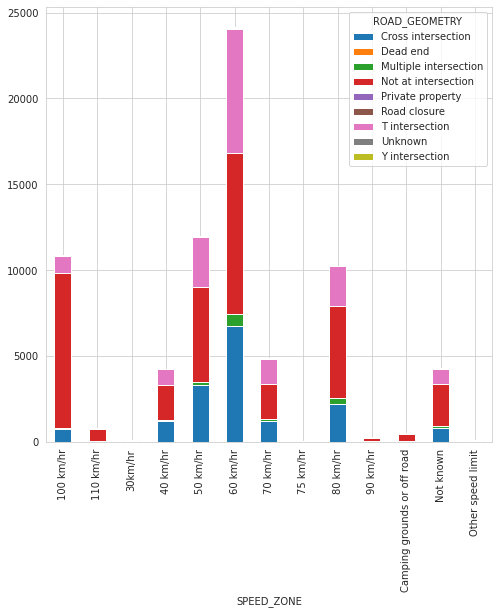

In [129]:
day_vs_acc_type = pd.crosstab(index=data["SPEED_ZONE"], 
                              columns=data["ROAD_GEOMETRY"]) 
day_vs_acc_type.plot(kind="bar", figsize=(8,8),stacked=True)

**Выводы:**

1. Больше аварий на Т-образных перекрестках в 60-километровых зонах скорости
2. Аварии в зонах повышенной скорости 100 км обычно происходят на дорогах без перекрестков.  


Другой пример анализа пары переменных - это просмотр типов аварий и дня недели. Ниже представлена ​​стековая столбчатая диаграмма для такого анализа

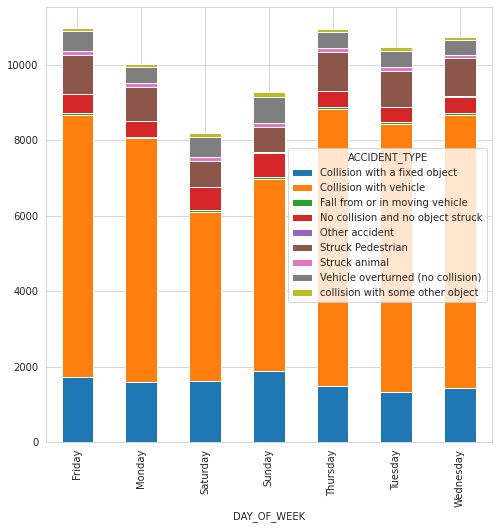

In [130]:
day_vs_acc_type = pd.crosstab(index=data["DAY_OF_WEEK"], columns=data["ACCIDENT_TYPE"])
day_vs_acc_type.plot(kind="bar", figsize=(8,8),stacked=True)

**Выводы:**

1. Столкновение двух автомобилей всегда является доминирующим типом ДТП
2. Наибольшее количество столкновений с неподвижным объектом приходится на выходные (особенно в субботу).
3. По выходным меньше инцидентов с пешеходов

# 4. Multivariate Analysis (Многомерный)
В процессе EDA иногда проверки одной или пар переменных недостаточно, чтобы исключить определенную гипотезу (или выбросы и аномальные случаи) из вашего набора данных. Вот почему в игру вступает многомерный анализ. Этот тип анализа обычно показывает взаимосвязь между двумя или более переменными с использованием некоторых статистических методов. При анализе возникает необходимость принимать во внимание большее количество переменных за раз, чтобы получить больше информации о ваших данных.

## 4.1 Contour Plot - Контурная диаграмма
Контурная линия или изолиния функции двух переменных - это кривая, вдоль которой функция имеет постоянное значение. Это сечение трехмерного графика функции f (x, y), параллельное плоскости x, y. Построим график между количеством травм и временем возникновения аварий. Возможности в этом наборе данных могут быть не самыми лучшими, чтобы показать лучшую визуализацию для такого графика, но для полноты мы включим его.

['09' '21' '14' ... '15' '13' '12']


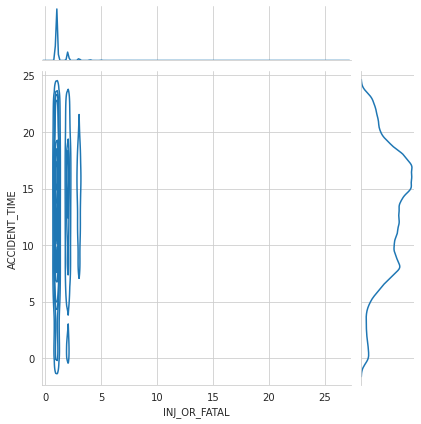

In [131]:
data['ACCIDENT_TIME'] = data['ACCIDENT_TIME'].str[:2]#just the hour ofday
print(data['ACCIDENT_TIME'].values)
data.ACCIDENT_TIME = data.ACCIDENT_TIME.astype(float).fillna(0.0)
sns.jointplot(x = "INJ_OR_FATAL", y = "ACCIDENT_TIME", data = data, kind = "kde")
plt.show()

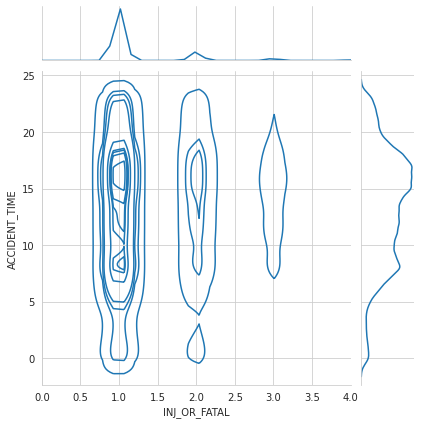

In [132]:
plot = sns.jointplot(x = "INJ_OR_FATAL", y = "ACCIDENT_TIME", data = data, kind = "kde")
plot.ax_marg_x.set_xlim(0, 4)
#plot.ax_marg_y.set_ylim(0, 1200)
plt.show()

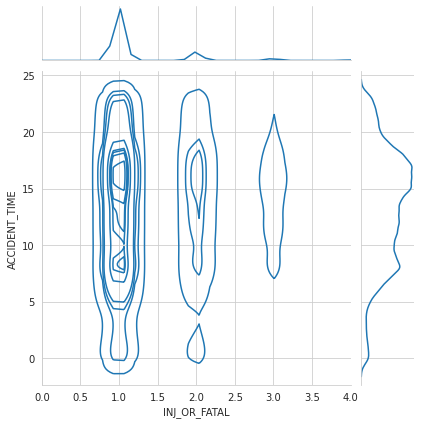

In [133]:
plot = sns.jointplot(x = "INJ_OR_FATAL", y = "ACCIDENT_TIME", data = data, kind = "kde" ,xlim=(0,4))
plt.show()

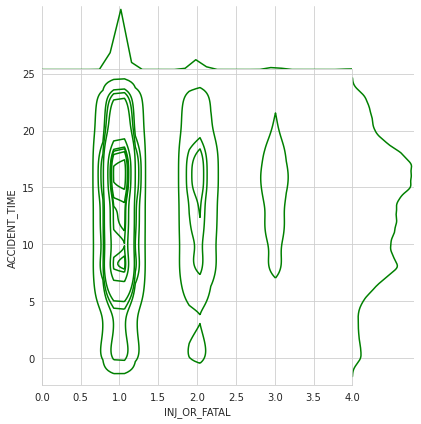

In [134]:
g = sns.jointplot("INJ_OR_FATAL", "ACCIDENT_TIME", data=data,
                  kind="kde", space=0, color="g")
g.ax_marg_x.set_xlim(0, 4)
#g.ax_marg_y.set_ylim(0, 1200)
plt.show()

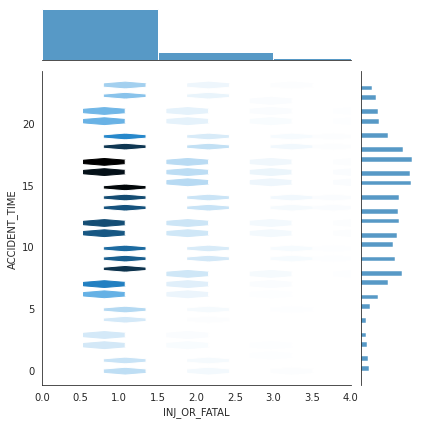

In [139]:
with sns.axes_style('white'):
  sns.jointplot(x="INJ_OR_FATAL", y="ACCIDENT_TIME", data=data, kind='hex',xlim=(0,4))

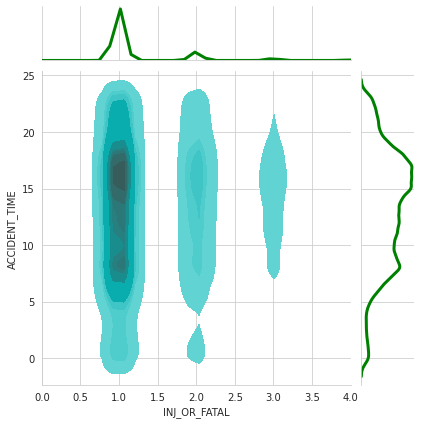

In [141]:

sns.jointplot(data=data, x='INJ_OR_FATAL', y='ACCIDENT_TIME', kind='kde',xlim=(0,4), 
              joint_kws=dict(fill=True, color='cyan'), 
              marginal_kws=dict(color='green', fill=False, linewidth=3))

**Выводы:**

1. Самая темная область или самая высокая плотность в контексте этого графика означает, что наибольшее количество травм происходит днем ​​примерно с 15:00 до 20:00.

Этот график также можно визуализировать в 3D, где он будет показывать холмистую структуру, где вершина холма имеет максимальную плотность точек, а плотность уменьшается по мере уменьшения наклона холма.


## 4.2 Principal Component Analysis (PCA) - Анализ главных компонент
PCA - это процедура преобразования статистических данных. Она использует ортогональное преобразование для преобразования набора наблюдений коррелированных переменных в набор значений линейно некоррелированных переменных, называемых главными компонентами. Это очень распространенный способ ускорения алгоритма машинного обучения, который снижает размерность входных функций, что чаще всего является разумным выбором. Фактически, он может полностью реструктурировать данные, удаляя избыточность и упорядочивая вновь полученные компоненты в соответствии с величиной исходной дисперсии, которую они выражают. Давайте сократим 12 числовых функций до 5 компонентов, чтобы выяснить, сможем ли мы уловить большую часть различий между выборками, используя меньшее количество новых переменных. Первый, нам необходимо стандартизировать изучаемые переменные с помощью функции `scale()`, которая необходима, если входные переменные имеют очень разные дисперсии. Затем мы выполняем анализ главных компонентов. Чтобы решить, сколько основных компонентов следует сохранить, обычно результаты суммируют путем построения графика зависимости компонентов от дисперсии, как показано ниже.


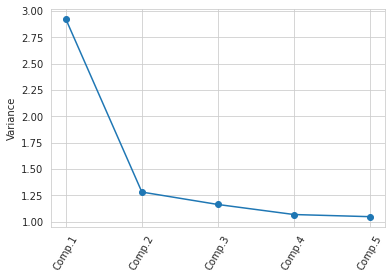

In [135]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()
X = numeric_features
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)
standardisedX.apply(np.std)
dim_reduction = PCA(n_components=5)
Xc = dim_reduction.fit_transform(scale(X))
screeplot(dim_reduction, standardisedX)

**Выводы:**

1. Наиболее очевидное изменение наклона графика происходит в компоненте 2, который является «изгибом» участка графика, что предполагает, что первых двух компонентов должно быть достаточно для сохранения.

Более того, PCA может дать отличное понимание того, как набор признаков совместно взаимодействует для описания результата (цели) анализа. Давайте преобразуем 12 числовых функций в 2 компонента PCA.

(72284,)


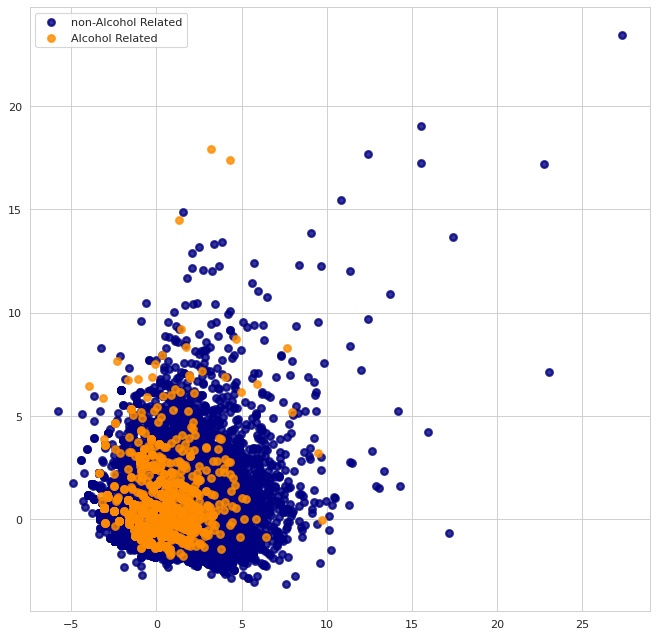

In [136]:
dim_reduction = PCA(n_components=2)
Xc = dim_reduction.fit_transform(scale(numeric_features))
colors = ['navy', 'darkorange']
target_names = ['non-Alcohol Related','Alcohol Related']
lw = 2
y = data["ALCOHOL_RELATED"].values
y = pd.Series(np.where(data.ALCOHOL_RELATED.values == 'Yes', 1, 0),data.index)
print(y.shape)
plt.figure(figsize=(10,10), dpi=80)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(Xc[y == i, 0], Xc[y == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
plt.legend()
plt.show()

**Выводы:**

1. Прогнозирующая сила числовых характеристик не позволяет легко определить шаблон классификации того, вызвана ли авария употреблением алкоголя или нет.
2. Это говорит о необходимости других вспомогательных функций (например, категориальных функций) или
3. Добавьте больше функций, которые были ранее удалены, и выполните для них еще несколько преобразований.
4. Используйте внешние источники данных.


# Заключение
Мы могли видеть, что на самом деле сложно понять набор данных и сделать выводы, не просматривая весь набор данных. Фактически, мы показали, что тратить больше времени на изучение набора данных - это хорошо потраченное время. Это может быть утомительный предварительный шаг к обработке данных, но это неизбежное зло. Однако, когда вы действительно начнете видеть интересные идеи, вы оцените каждую минуту, вложенную в такой процесс. EDA позволяет специалистам по обработке данных немедленно понимать ключевые проблемы в данных и иметь возможность направлять более глубокий анализ в правильном направлении. Успешное изучение данных гарантирует заинтересованным сторонам, что они не упустят возможности использовать свои данные. Они могут легко определить риски, включая низкое качество данных, ненадежность, плохую разработку функций и другие неопределенности. В этой статье, мы рассмотрели ряд полезных вводных методов исследования / анализа данных и методов визуализации. Приведенные рекомендации EDA должны позволить специалистам по обработке данных получить проницательное и более глубокое понимание стоящей проблемы и уверенно принять решение о следующем шаге.